In [2]:
# El conjunto de entrenamiento Titanic_Train: debe usarse para construir los modelos de aprendizaje automático. Para el conjunto de entrenamiento, proporcionamos el resultado (también conocido como "verdad") para cada pasajero. El modelo se basará en características como el género y la clase de los pasajeros, así como también otras características.

# El conjunto de prueba Titanic_test: debe usarse para ver qué tan bien se desempeña el modelo en datos no vistos. Para el conjunto de prueba, no proporcionamos los resultados finales para cada pasajero, ya que es nuestro trabajo predecir estos resultados. Para cada pasajero en el conjunto de prueba, se usará el aprendizaje del modelo que se entrenó para predecir si sobrevivieron o no al hundimiento del Titanic.

# Para ello, comenzaremos trabajando con los siguientes pasos de cálculo:

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import numpy as np
from sklearn import tree
from sklearn.model_selection import train_test_split

%matplotlib inline

sns.set() 

In [6]:
train_df = pd.read_csv('https://raw.githubusercontent.com/ml008008/Portfolio/main/train(2).csv')
test_df=pd.read_csv('https://raw.githubusercontent.com/ml008008/Portfolio/main/test(2).csv')


In [7]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
#Revisar cuánta información tiene almacenada el set de datos

In [12]:
print("La cantidad de datos para la variable de entrenamiento son:",train_df.shape)
print("La cantidad de datos para la variable de pruebas o validacion son:", test_df.shape)

La cantidad de datos para la variable de entrenamiento son: (891, 12)
La cantidad de datos para la variable de pruebas o validacion son: (418, 11)


In [ ]:
#Revisaremos también si, para la base de entrenamiento, las variables contienen valores nulos y su tipo de dato.

In [13]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
# revisaremos la distribución de sobrevivientes que contiene la base de datos, 
# con la finalidad de ver qué tan balanceada puede estar nuestra base de datos en relación 
# con sí sobrevivieron más hombres que mujeres o viceversa.

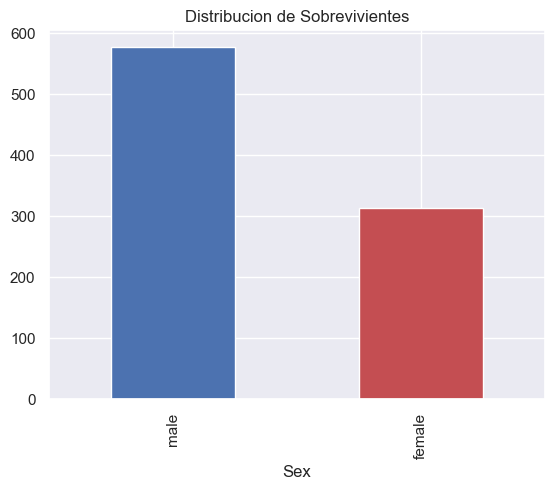

In [19]:
#Revision de distribucion de sobrevivientes
train_df.Sex.value_counts().plot(kind='bar', color=['b', 'r'])
plt.title('Distribucion de Sobrevivientes')
plt.show()


In [20]:
train_df.Sex.value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

In [22]:
train_df.Sex.isnull().value_counts()

Sex
False    891
Name: count, dtype: int64

In [ ]:
#No hay valores nulos

In [ ]:
# Hay desbalance en Genero de pasageros , hay mayor numeo de hombres que mujeres para el entrenamiento del modelo

In [23]:
#Nueva sección de librerías de Scikit learn

from sklearn import preprocessing
label_encoder=preprocessing.LabelEncoder()

encoder_sex= label_encoder.fit_transform(train_df['Sex'])
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [24]:
train_df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
#la variable Age tiene 177 registros vacíos; la variable Cabin, 687; y la variable Embarked, 2 datos nulos.

In [ ]:
#comenzaremos a rellenar los valores que no tienen datos para la variable Age (edad). 

# En este caso, para no perder información, a los valores nulos los rellenaremos con 
# la mediana estadística de edad que contiene la variable Age.

# En el caso de Embarked (embarque), también realizaremos el mismo proceso.


In [25]:
#Variable Age y Embarked

train_df['Age'] = train_df['Age'].fillna(train_df['Age'].median())
train_df['Embarked'] = train_df['Embarked'].fillna('S')

In [ ]:
# Ahora trabajaremos con nuestros predictores, en los cuales tendremos que hacer unos cambios en los datos y,
# dentro de ellos, tendremos que eliminar aquellos datos que no nos agregan valor, mediante la función Drop.

# Para ello, eliminaremos las variables PassengerId, Survived, Name, Ticket y Cabin.

# Ojo al dato:

# Survived se elimina porque es la etiqueta que queremos que el algoritmo busque predecir.

# Posteriormente, tomaremos los siguientes datos categóricos y vamos a crear una variable adicional 
# de datos solo categóricos.

In [ ]:
#Creación de variable adicional de datos categóricos

In [29]:
train_predictors = train_df.drop(['PassengerId', 'Survived', 'Name', 'Ticket', 'Cabin'], axis = 1)

categorical_cols = [cname for cname in train_predictors.columns if
                    train_predictors[cname].nunique() < 10 and
                    train_predictors[cname].dtype == 'object'
                   ]

numerical_cols = [cname for cname in train_predictors.columns if 
                  train_predictors[cname].dtype in ['int64', 'float64']
                 ]


In [ ]:
#Revisamos cada una de las variables

In [30]:
train_predictors

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22.0,1,0,7.2500,S
1,1,female,38.0,1,0,71.2833,C
2,3,female,26.0,0,0,7.9250,S
3,1,female,35.0,1,0,53.1000,S
4,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...
886,2,male,27.0,0,0,13.0000,S
887,1,female,19.0,0,0,30.0000,S
888,3,female,28.0,1,2,23.4500,S
889,1,male,26.0,0,0,30.0000,C


In [32]:
categorical_cols

['Sex', 'Embarked']

In [33]:
numerical_cols

['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

In [ ]:
#Consolidación de las variables categóricas y numéricas

In [34]:
my_cols= categorical_cols + numerical_cols

train_predictors = train_predictors[my_cols]

train_predictors

,Sex,Embarked,Pclass,Age,SibSp,Parch,Fare
0,male,S,3,22.0,1,0,7.2500
1,female,C,1,38.0,1,0,71.2833
2,female,S,3,26.0,0,0,7.9250
3,female,S,1,35.0,1,0,53.1000
4,male,S,3,35.0,0,0,8.0500
...,...,...,...,...,...,...,...
886,male,S,2,27.0,0,0,13.0000
887,female,S,1,19.0,0,0,30.0000
888,female,S,3,28.0,1,2,23.4500
889,male,C,1,26.0,0,0,30.0000


In [ ]:
# Teniendo el set de datos ya consolidado, haremos uso de variables artificiales conocidas como Dummies, 
# que tienen como finalidad generar nuevas columnas de datos por cada una de las categorías que tenga
# cada variable original.

# Por ejemplo, si la variable Sexo contiene masculino y femenino, 
# la variable dummy generará dos columnas en el set de datos: una denominada Sexo Masculino
#     y otra denominada Sexo Femenino, de la siguiente forma.

# Variable dummy

In [38]:
dummy_encoded_train_predictors=pd.get_dummies(train_predictors)
dummy_encoded_train_predictors

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,22.0,1,0,7.2500,False,True,False,False,True
1,1,38.0,1,0,71.2833,True,False,True,False,False
2,3,26.0,0,0,7.9250,True,False,False,False,True
3,1,35.0,1,0,53.1000,True,False,False,False,True
4,3,35.0,0,0,8.0500,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...
886,2,27.0,0,0,13.0000,False,True,False,False,True
887,1,19.0,0,0,30.0000,True,False,False,False,True
888,3,28.0,1,2,23.4500,True,False,False,False,True
889,1,26.0,0,0,30.0000,False,True,True,False,False


dummy_encoded_train_predictors

In [ ]:
#Hasta esta parte, ya contamos con un set de datos preprocesado para ser trabajado posteriormente
#y generar nuestro árbol de decisión.


In [ ]:
#2
#ENTRENAMIENTO DEL MODELO DE CLASIFICACION

In [ ]:
# Para comenzar con el proceso de entrenamiento, primeramente, 
# dividiremos nuestro set de datos en las columnas con las cuales aprenderá el modelo, 
# denominaremos esto x_features_one, mientras que, por otro lado,
# tomaremos la variable objetivo que tiene los datos de salida y_target.
# No olvidar que esta variable es la que nos indica si la persona sobrevivió o no.

In [49]:
#seleccion y creacion de variables
#variable y_target 

y_target = train_df['Survived'].values
x_features_one = dummy_encoded_train_predictors.values



In [50]:
y_target

array([0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1,

In [51]:
x_features_one

array([[3, 22.0, 1, ..., False, False, True],
       [1, 38.0, 1, ..., True, False, False],
       [3, 26.0, 0, ..., False, False, True],
       ...,
       [3, 28.0, 1, ..., False, False, True],
       [1, 26.0, 0, ..., True, False, False],
       [3, 32.0, 0, ..., False, True, False]], dtype=object)

In [ ]:
# Ahora viene una parte totalmente importante, que es la de entrenar la información.

# Para ello, se crearán 4 variables:

#     X_train: entrenamiento para variable X.
#     X_validation: test para variable X.
#     Y_train: entrenamiento para variable Y.
#     Y_validation: test para variable Y.


# A cada uno de estos datos los vamos a dividir en entrenamiento y validación con el método: train_test_split

In [52]:
#Metodo train_test_split


In [54]:
x_train, x_test, y_train, y_test = train_test_split(x_features_one, y_target, test_size =.25, random_state=1)
tree_one = tree.DecisionTreeClassifier()
tree_one = tree_one.fit(x_train, y_train)
tree_one_accuracy = round(tree_one.score(x_test,y_test), 4)
tree_one_accuracy


0.7489

In [107]:
#74% de accuracy(exactitud)

In [108]:
# Ahora creamos nuestro primer árbol.
# Creación de árbol
#3. Visualización de un árbol de decisión


# En la sección anterior, vimos cómo crear el árbol de decisión basado en el entrenamiento del set de datos del 
# Titanic.

# La pregunta que surge ahora es: ¿de qué nos sirve entrenar el modelo si no lo podemos visualizar? 
#     Entonces, en este momento es cuando realizaremos nuestra visualización de un árbol de decisión 
#     con base en el entrenamiento que hemos entregado a una máquina.

# Para ello, recordemos que, al entrenar el modelo de Titanic, obtuvimos como resultado de precisión un 74 %.

# Ahora, podremos observar cada uno de los caminos mediante los cuales la máquina aprende para poder tomar
# la decisión.

# Para ello, utilizaremos el siguiente código, que nos permitirá mostrar cada uno de los 
# caminos con los cuales el árbol es capaz de ir tomando decisiones a medida que va analizando cada uno de los datos.

# Figura 22. Importación de la función StringIO


In [109]:
pip install pydotplus


[notice] A new release of pip is available: 24.1.2 -> 24.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [110]:
from io import StringIO
from IPython.display import Image, display
import pydotplus

In [111]:
# En la línea 1, importaremos la función StringIO, la cual nos permite trabajar con diversos archivos externos
# (recuerda que estamos utilizando archivos .csv externos al entorno de Python).

# En la línea 2, importamos de Image y display, esto nos da la posibilidad de interactuar 
# y crear imágenes de tipo nodo.

# Adicional a eso, también importaremos pydotplus, la cual nos permitirá usar 
# el lenguaje grapghviz para crear imágenes.

# Figura 23. Importación de pydotplus

In [112]:
# Posteriormente, comenzaremos a ejecutar códigos que nos permitan generar el gráfico de nuestro primer árbol de decisión.

# Ejecución de código para generar árbol de decisión

In [113]:
out= StringIO()
tree.export_graphviz(tree_one, out_file=out)
graph=pydotplus.graph_from_dot_data(out.getvalue())
# Ajustar el tamaño de la imagen
graph.set_graph_defaults(size='30,30!')  # Cambiar el tamaño según sea necesario

graph.write_png('titanic.png')


True

In [114]:
# En la línea 5, exportaremos los datos del árbol en lenguaje graphviz a StringIO.

# En la línea 7, generaremos el gráfico a través de pydotplus.

# En la línea 8, guardamos el archivo en formato png para poder descargar.

# Una vez ejecutado el código, podrás encontrar la impresión del árbol para visualizar.

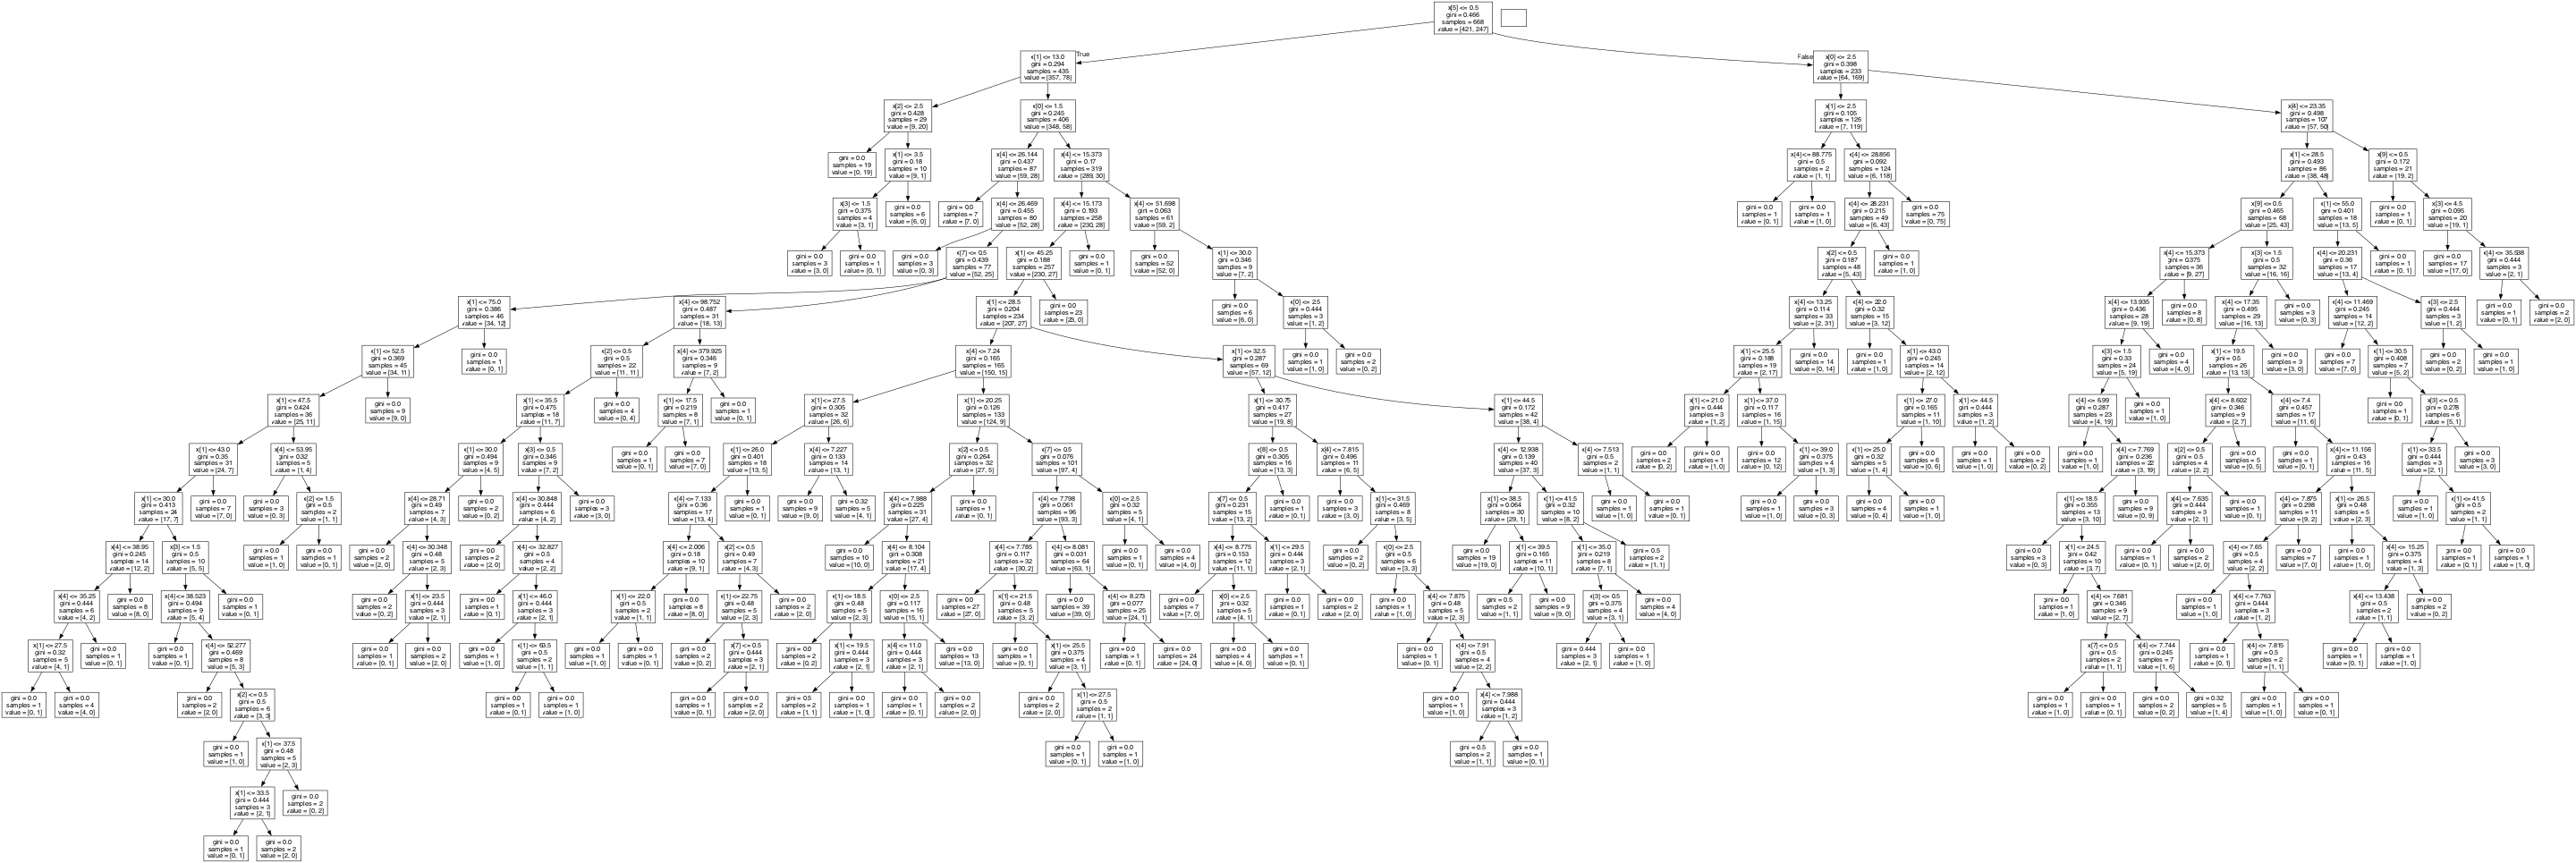

In [115]:
display(Image('titanic.png'))

In [116]:
# from io import StringIO
# from IPython.display import Image, display
# import pydotplus
# from sklearn.tree import export_graphviz

# # Assuming 'tree_one' is your trained decision tree model

# # Step 1: Create a DOT data string from the decision tree
# out = StringIO()
# export_graphviz(tree_one, out_file=out)

# # Step 2: Create a graph from the DOT data
# graph = pydotplus.graph_from_dot_data(out.getvalue())

# # Step 3: Write the graph to a PNG file
# graph.write_png('titanic.png')

# # Step 4: Display the PNG image within the notebook
# display(Image('titanic.png'))


In [117]:
# #En él podrás ver, por ejemplo:

#     Sample: representa el 75 % de la muestra que tenía el set de datos original. Por ello es que el valor es de 668.
#     Value: si sumamos 421 + 247, de los 668 datos de la muestra. Aquellos que tienen valor 1 (true) son 421, mientras que los valores 0 (falsos) son 247.